In [190]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ABOUT DATASET

In [191]:
train_feat=pd.read_csv("/content/training_set_features.csv")
train_lab=pd.read_csv("/content/training_set_labels.csv")

In [192]:
train_feat.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [193]:
train_lab.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [194]:
train_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   xyz_concern                  26615 non-null  float64
 2   xyz_knowledge                26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_xyz              24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [195]:
train.columns

Index(['xyz_concern', 'xyz_knowledge', 'doctor_recc_xyz',
       'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months',
       'health_worker', 'opinion_xyz_vacc_effective',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_sick_from_vacc', 'xyz_vaccine', 'seasonal_vaccine',
       'income_poverty_<= $75,000, Above Poverty', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty'],
      dtype='object')

In [202]:
train=pd.merge(train_feat,train_lab,how="right")

**EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='income_poverty', ylabel='Count'>

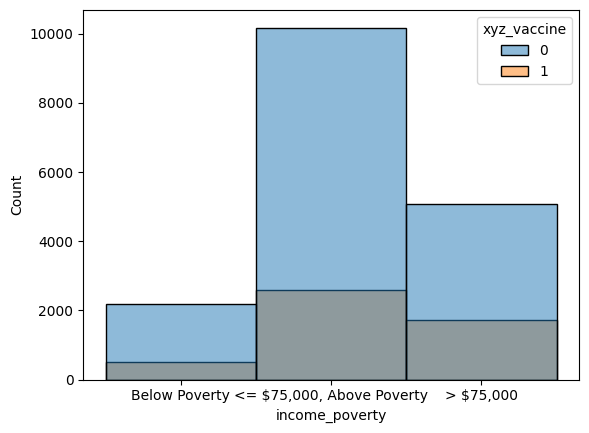

In [203]:
sns.histplot(data=train,x="income_poverty",hue="xyz_vaccine")

<Axes: xlabel='income_poverty', ylabel='Count'>

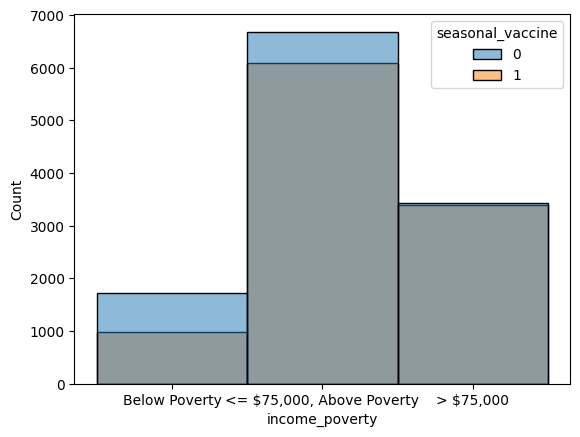

In [204]:
sns.histplot(data=train,x="income_poverty",hue="seasonal_vaccine")

<Axes: xlabel='opinion_seas_risk', ylabel='xyz_vaccine'>

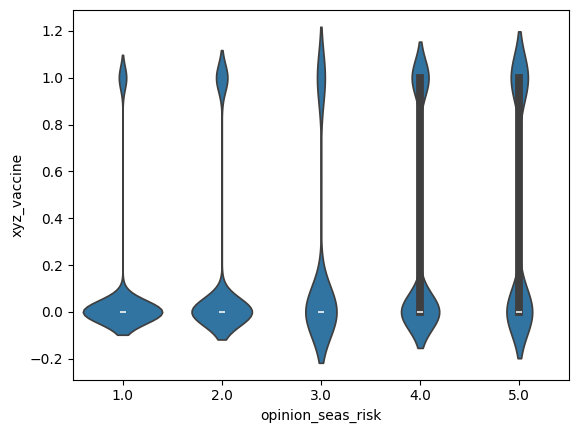

In [205]:
sns.violinplot(data=train,x="opinion_seas_risk",y="xyz_vaccine")

In [206]:
train=train[['doctor_recc_xyz', 'doctor_recc_seasonal','chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc','xyz_vaccine', 'seasonal_vaccine']]

In [207]:
train.columns

Index(['doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_xyz_vacc_effective',
       'opinion_xyz_risk', 'opinion_xyz_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'xyz_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [208]:
train.isnull().sum()

doctor_recc_xyz                2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
opinion_xyz_vacc_effective      391
opinion_xyz_risk                388
opinion_xyz_sick_from_vacc      395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
xyz_vaccine                       0
seasonal_vaccine                  0
dtype: int64

In [117]:
train.shape

(26707, 14)

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   doctor_recc_xyz              24547 non-null  float64
 3   doctor_recc_seasonal         24547 non-null  float64
 4   chronic_med_condition        25736 non-null  float64
 5   child_under_6_months         25887 non-null  float64
 6   health_worker                25903 non-null  float64
 7   opinion_xyz_vacc_effective   26316 non-null  float64
 8   opinion_xyz_sick_from_vacc   26312 non-null  float64
 9   opinion_seas_vacc_effective  26245 non-null  float64
 10  opinion_seas_sick_from_vacc  26170 non-null  float64
 11  income_poverty               22284 non-null  object 
 12  xyz_vaccine                  26707 non-null  int64  
 13  seasonal_vaccine

In [209]:
train.dropna(inplace=True)

In [212]:
correl=train.corr()

<Axes: >

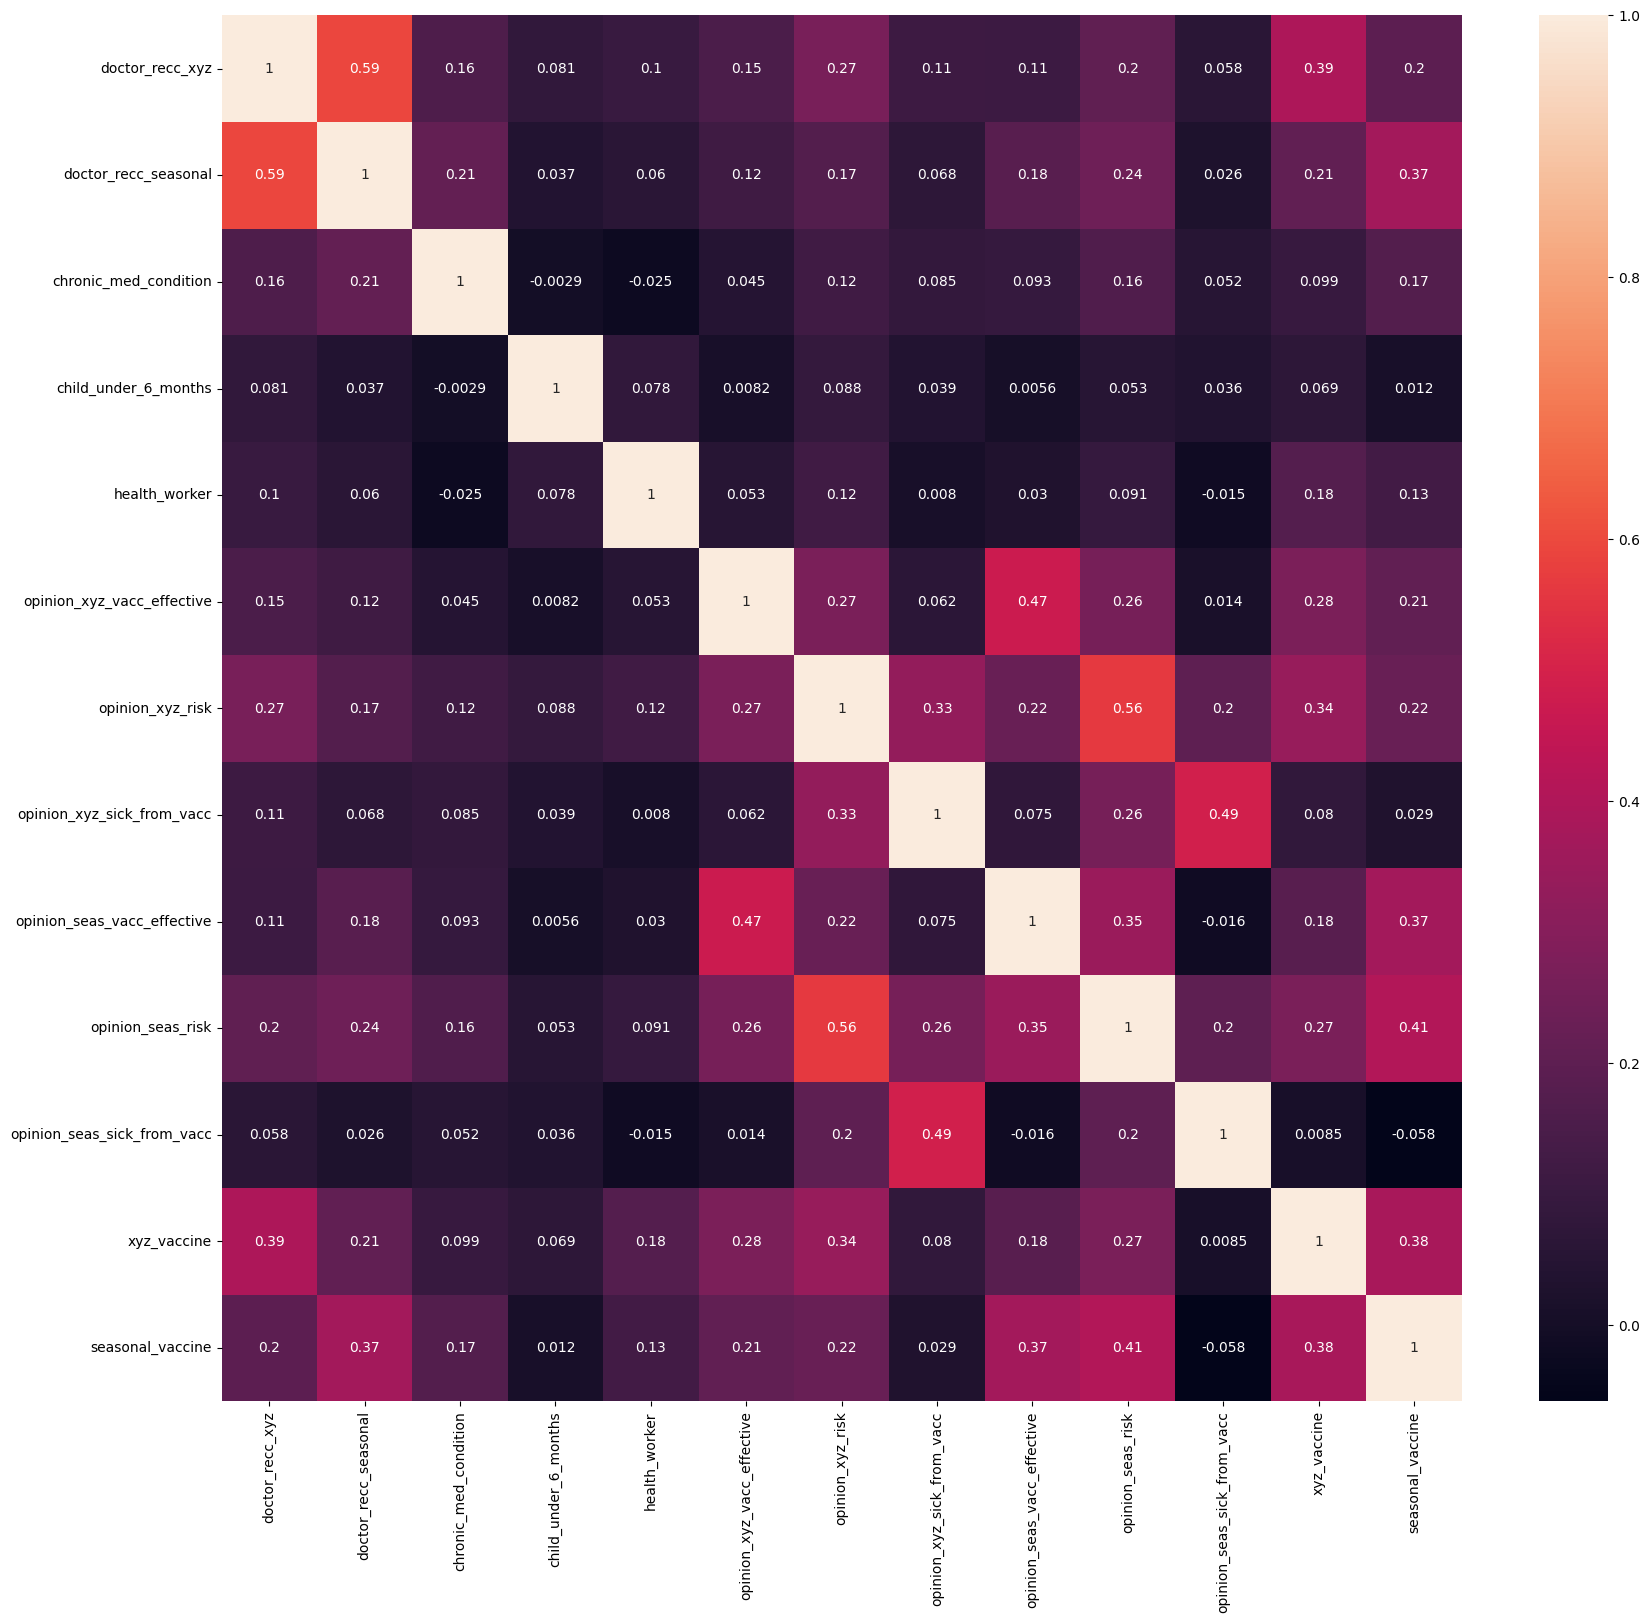

In [213]:
plt.figure(figsize=(20,18))
sns.heatmap(data=correl,annot=True)

In [214]:
Y=train.iloc[:,-2:]
X=train.iloc[:,:-2]

**SPLITTING DATA FOR TRAINING AND TEST OUR MODELS**

In [216]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [217]:
Y1_train=y_train[["xyz_vaccine"]]
Y2_train=y_train[["seasonal_vaccine"]]
Y1_test=y_test[["xyz_vaccine"]]
Y2_test=y_test[["seasonal_vaccine"]]

# MODEL SELECTION

In [222]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [224]:
lr_model_xyz = LogisticRegression(class_weight='balanced')
lr_model_xyz.fit(X_train, Y1_train)
y1_pred_proba = lr_model_xyz.predict_proba(X_test)
auc_score_xyz = roc_auc_score(Y1_test, y1_pred_proba[:, 1],average="macro")
auc_score_xyz

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8249183723047571

In [221]:
lr_model_szn = LogisticRegression(class_weight='balanced')
lr_model_szn.fit(X_train, Y2_train)
y2_pred_proba = lr_model_szn.predict_proba(X_test)
auc_score_szn = roc_auc_score(Y2_test, y2_pred_proba[:, 1],average="macro")
auc_score_szn

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8275381509797382

In [225]:
y1_pred_proba

array([[0.40043098, 0.59956902],
       [0.55220835, 0.44779165],
       [0.64088212, 0.35911788],
       ...,
       [0.39412244, 0.60587756],
       [0.23201661, 0.76798339],
       [0.30956616, 0.69043384]])

In [232]:
test=pd.read_csv("/content/test_set_features.csv")

In [233]:
test=test[['doctor_recc_xyz', 'doctor_recc_seasonal','chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_xyz_vacc_effective', 'opinion_xyz_risk','opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc']]

In [238]:
test=test.fillna(round(test.mean()))

In [239]:
test.isnull().sum()

doctor_recc_xyz                0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_xyz_vacc_effective     0
opinion_xyz_risk               0
opinion_xyz_sick_from_vacc     0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
dtype: int64

In [240]:
xyz_proba = lr_model_xyz.predict_proba(test)
szn_proba = lr_model_szn.predict_proba(test)

In [241]:
sub=pd.read_csv("/content/test_set_features.csv")

In [242]:
sub.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [243]:
submission=sub[["respondent_id"]]

In [245]:
submission["xyz_vaccine"]=xyz_proba[:, 1]
submission["szn_vaccine"]=szn_proba[:, 1]

<ipython-input-245-9d57b9a7cf0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["xyz_vaccine"]=xyz_proba[:, 1]
<ipython-input-245-9d57b9a7cf0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission["szn_vaccine"]=szn_proba[:, 1]


In [248]:
submission.to_csv("submission.csv",index=None)